In [1]:
import pandas
from math import ceil
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from numpy import percentile
from scipy import stats
bank = pandas.read_csv('BankChurners.csv',na_values = 'Unknown')
names = list (bank.columns)
numeric_names = ["CLIENTNUM","Customer_Age","Months_on_book","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio",
                 "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                 "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# Sum of null cells

In [2]:
bank.isnull().sum()

CLIENTNUM                                                                                                                                0
Attrition_Flag                                                                                                                           0
Customer_Age                                                                                                                             0
Gender                                                                                                                                   0
Dependent_count                                                                                                                          0
Education_Level                                                                                                                       1519
Marital_Status                                                                                                                         749
Income_Category            

# Calculating probability

In [3]:
marital_status = bank['Marital_Status'].value_counts().to_list()
marital_probability = []
marital_sum = sum(marital_status)
for i in marital_status:
    marital_probability.append(i/marital_sum)
    
education_level = bank['Education_Level'].value_counts().to_list()
education_probability = []
education_sum = sum(education_level)
for i in education_level:
    education_probability.append(i/education_sum)
    
income_category = bank['Income_Category'].value_counts().to_list()
income_probability = []
income_sum = sum(income_category)
for i in income_category:
    income_probability.append(i/income_sum)


# Changing nan cells

In [4]:
status = ['Married','Single','Divorced']
school = ['Graduate','High School','Uneducated','College','Post-Graduate','Doctorate']
money  = ['Less than $40K','$40K - $60K','$80K - $120K','$60K - $80K','$120K +']

for i,num in enumerate(bank['Education_Level']):
    if type(num) == float :
        arr = np.random.choice(school,1, p=[education_probability[0], education_probability[1],education_probability[2],education_probability[3], education_probability[4],education_probability[5]])
        cell = ''.join(arr)
        bank.at[i, 'Education_Level'] = cell
        
for i,num in enumerate(bank['Marital_Status']):
    if type(num) == float :
        arr = np.random.choice(status, 1, p=[marital_probability[0],marital_probability[1],marital_probability[2]])
        cell = ''.join(arr)
        bank.at[i, 'Marital_Status'] = cell
        
for i,num in enumerate(bank['Income_Category']):
    if type(num) == float :
        arr = np.random.choice(money, 1, p=[income_probability[0], income_probability[1],income_probability[2],income_probability[3],income_probability[4]])
        cell = ''.join(arr)
        bank.at[i, 'Income_Category'] = cell 

# Sum of null cells

In [5]:
bank.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

# Changing str to num

In [6]:
attrition_dict = {'Existing Customer' : 1,'Attrited Customer': 0}
gender_dict = {'M' : 1,'F' : 0}
education_dict = {'Uneducated' : 0,'Graduate' : 1 ,'High School' : 2,'College' : 3,'Post-Graduate' : 4,'Doctorate' : 5}
marital_dict = {'Married' : 1, 'Single' : 0, 'Divorced' : 2}
card_dict = {'Blue' : 0, 'Silver' : 1, 'Gold' : 2, 'Platinum' : 3}

for i,num in enumerate(bank['Attrition_Flag']):
    bank.at[i, 'Attrition_Flag'] = attrition_dict[num]

for i,num in enumerate(bank['Gender']):
    bank.at[i, 'Gender'] = gender_dict[num] 
    
for i,num in enumerate(bank['Marital_Status']):
    bank.at[i, 'Marital_Status'] = marital_dict[num]     

for i,num in enumerate(bank['Education_Level']):
    bank.at[i, 'Education_Level'] = education_dict[num]

for i,num in enumerate(bank['Income_Category']):
    number_list = re.findall(r"\d+",num)
    bank.at[i, 'Income_Category'] = int(max(number_list))*1000 
    
for i,num in enumerate(bank['Card_Category']):
    bank.at[i, 'Card_Category'] = card_dict[num]

for i in names:
    pandas.to_numeric(bank[i],downcast='integer',errors ='coerce')

bank.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

# Graphics before deleting outliers 

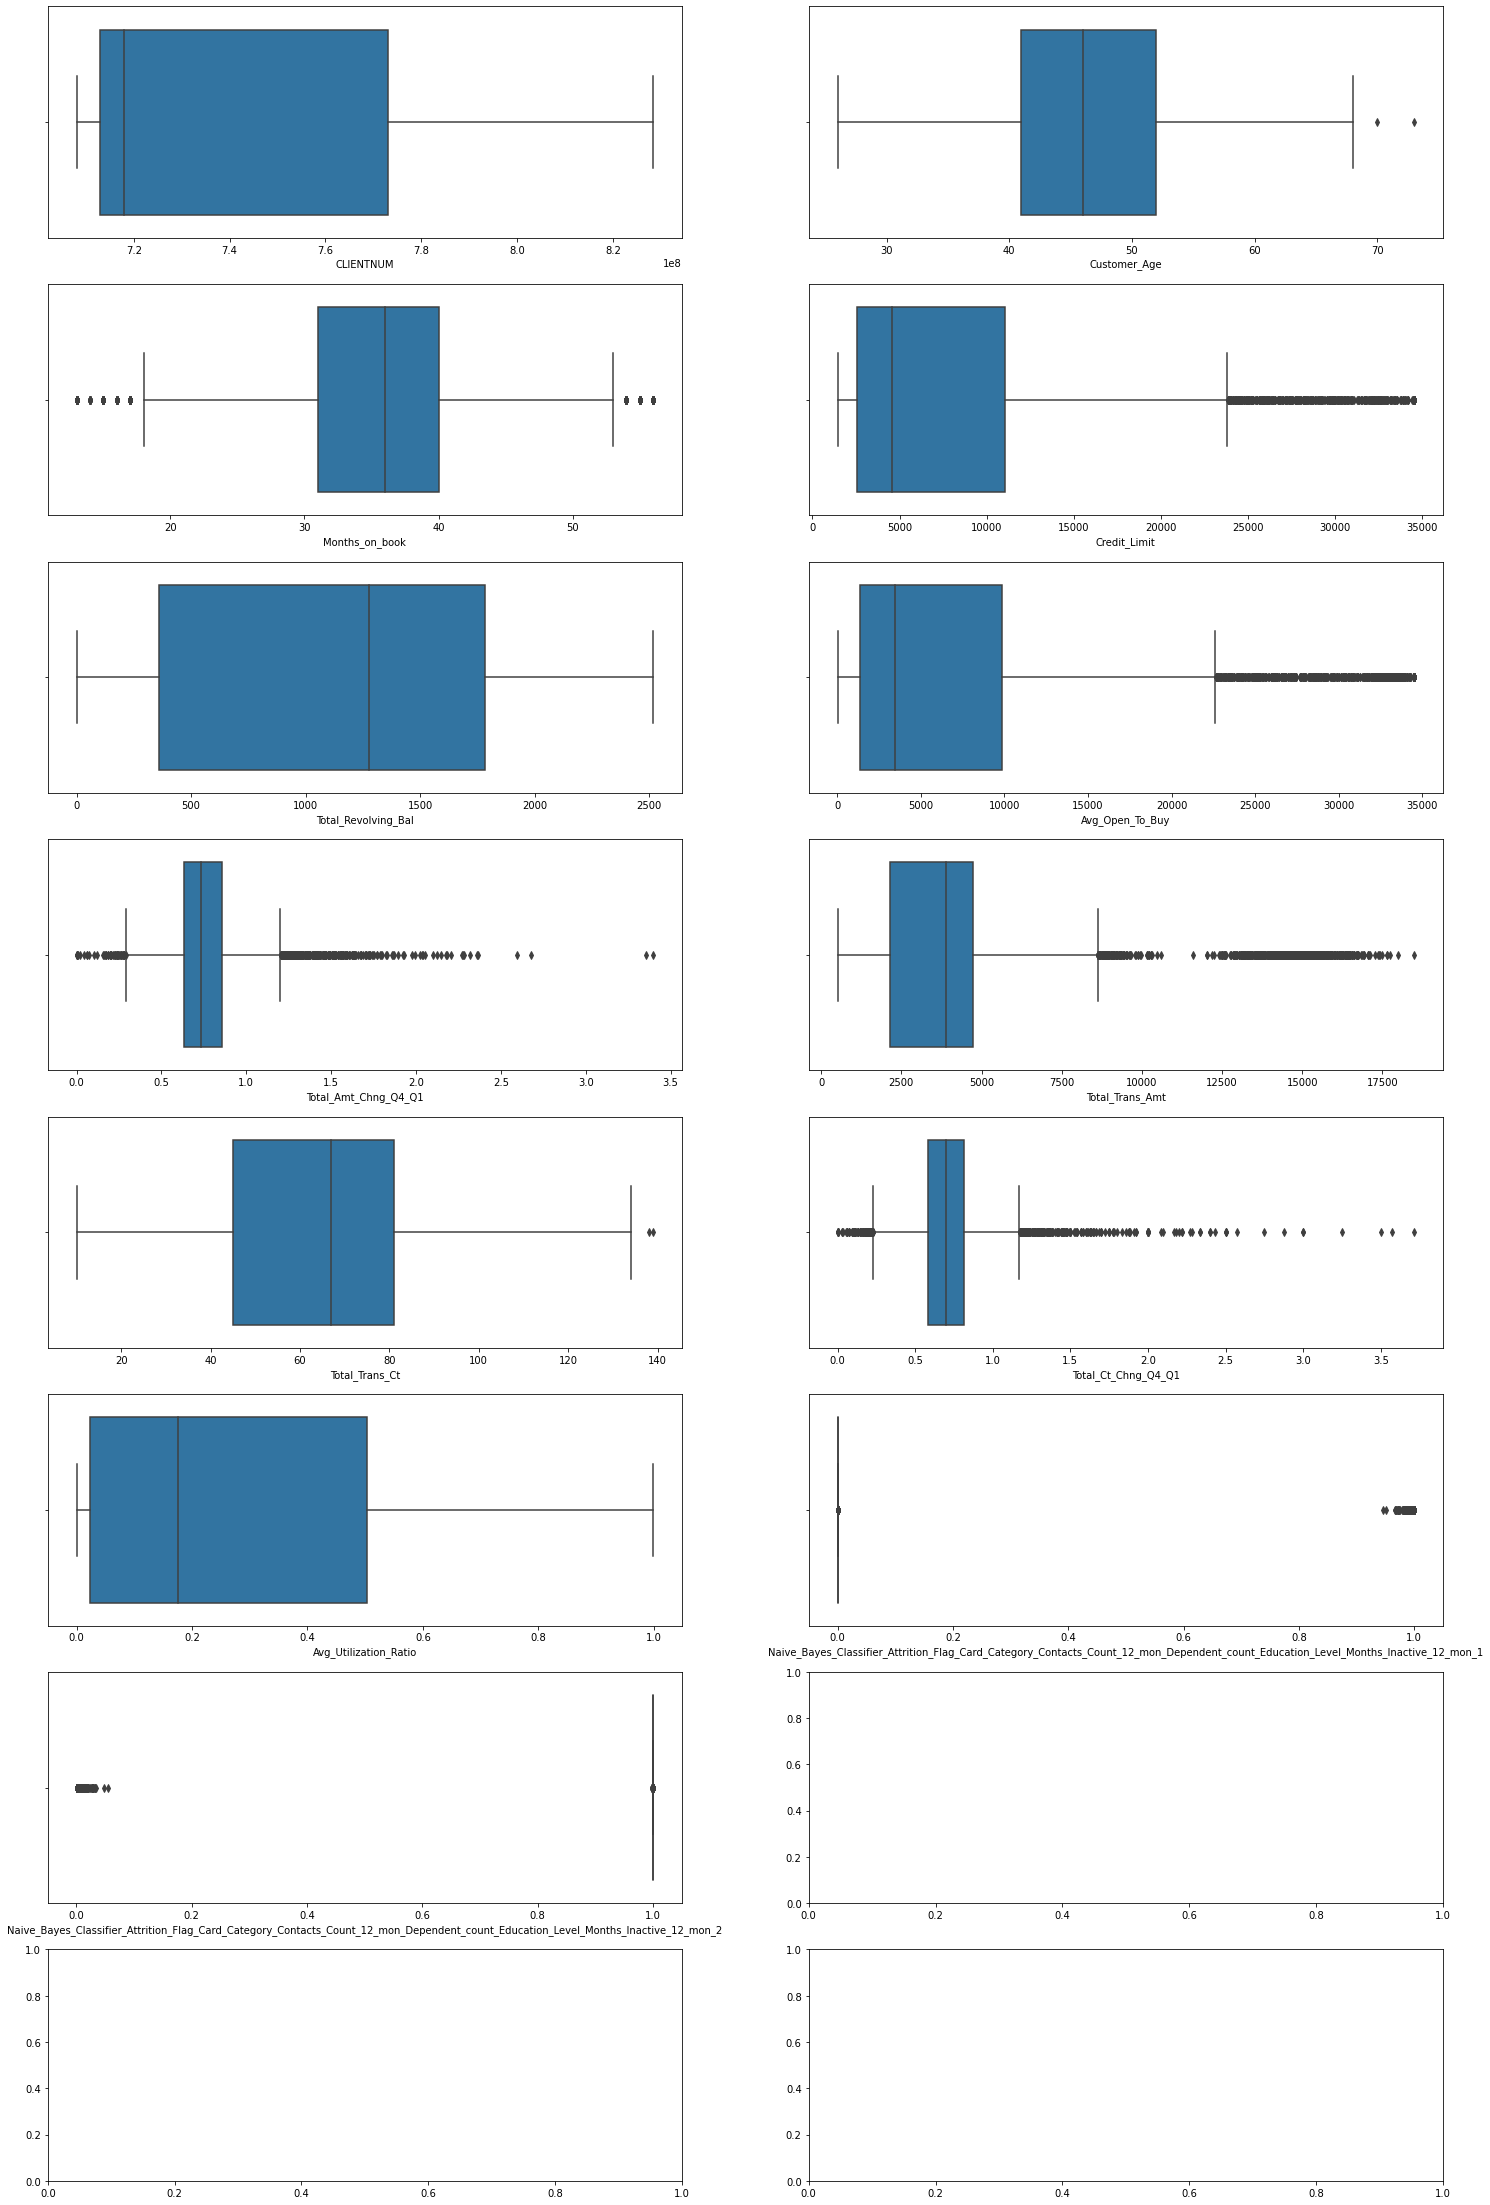

In [7]:
fig, axs = plt.subplots(8, 2, figsize=(25, 40))
axes = [item for sublist in axs for item in sublist]
j = 0

for i in numeric_names:
    sea.boxplot(data=bank, x=bank[i], ax=axes[j])
    j += 1

plt.show()

# Scatter before deleting

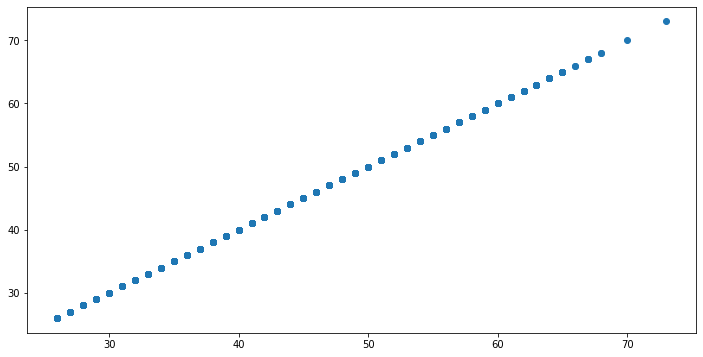

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(bank['Customer_Age'], bank['Customer_Age'])

# Deleting outliers 

In [9]:
print(bank.shape)
for i in numeric_names:
    z=np.abs(stats.zscore(bank[i]))
    bank=bank[(z< 3)]
print(bank.shape)

(10127, 23)
(9485, 23)


# Scatter after removing

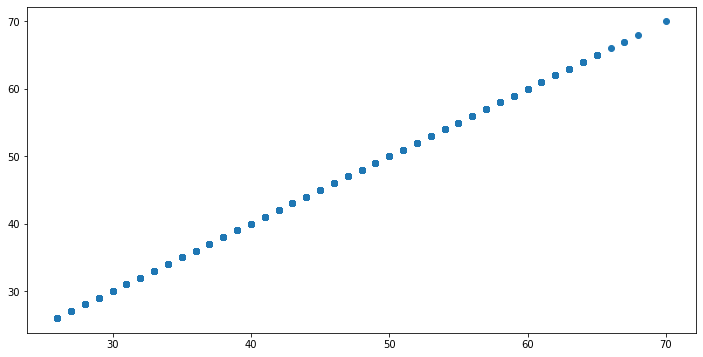

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(bank['Customer_Age'], bank['Customer_Age'])

# Graphs after deleting

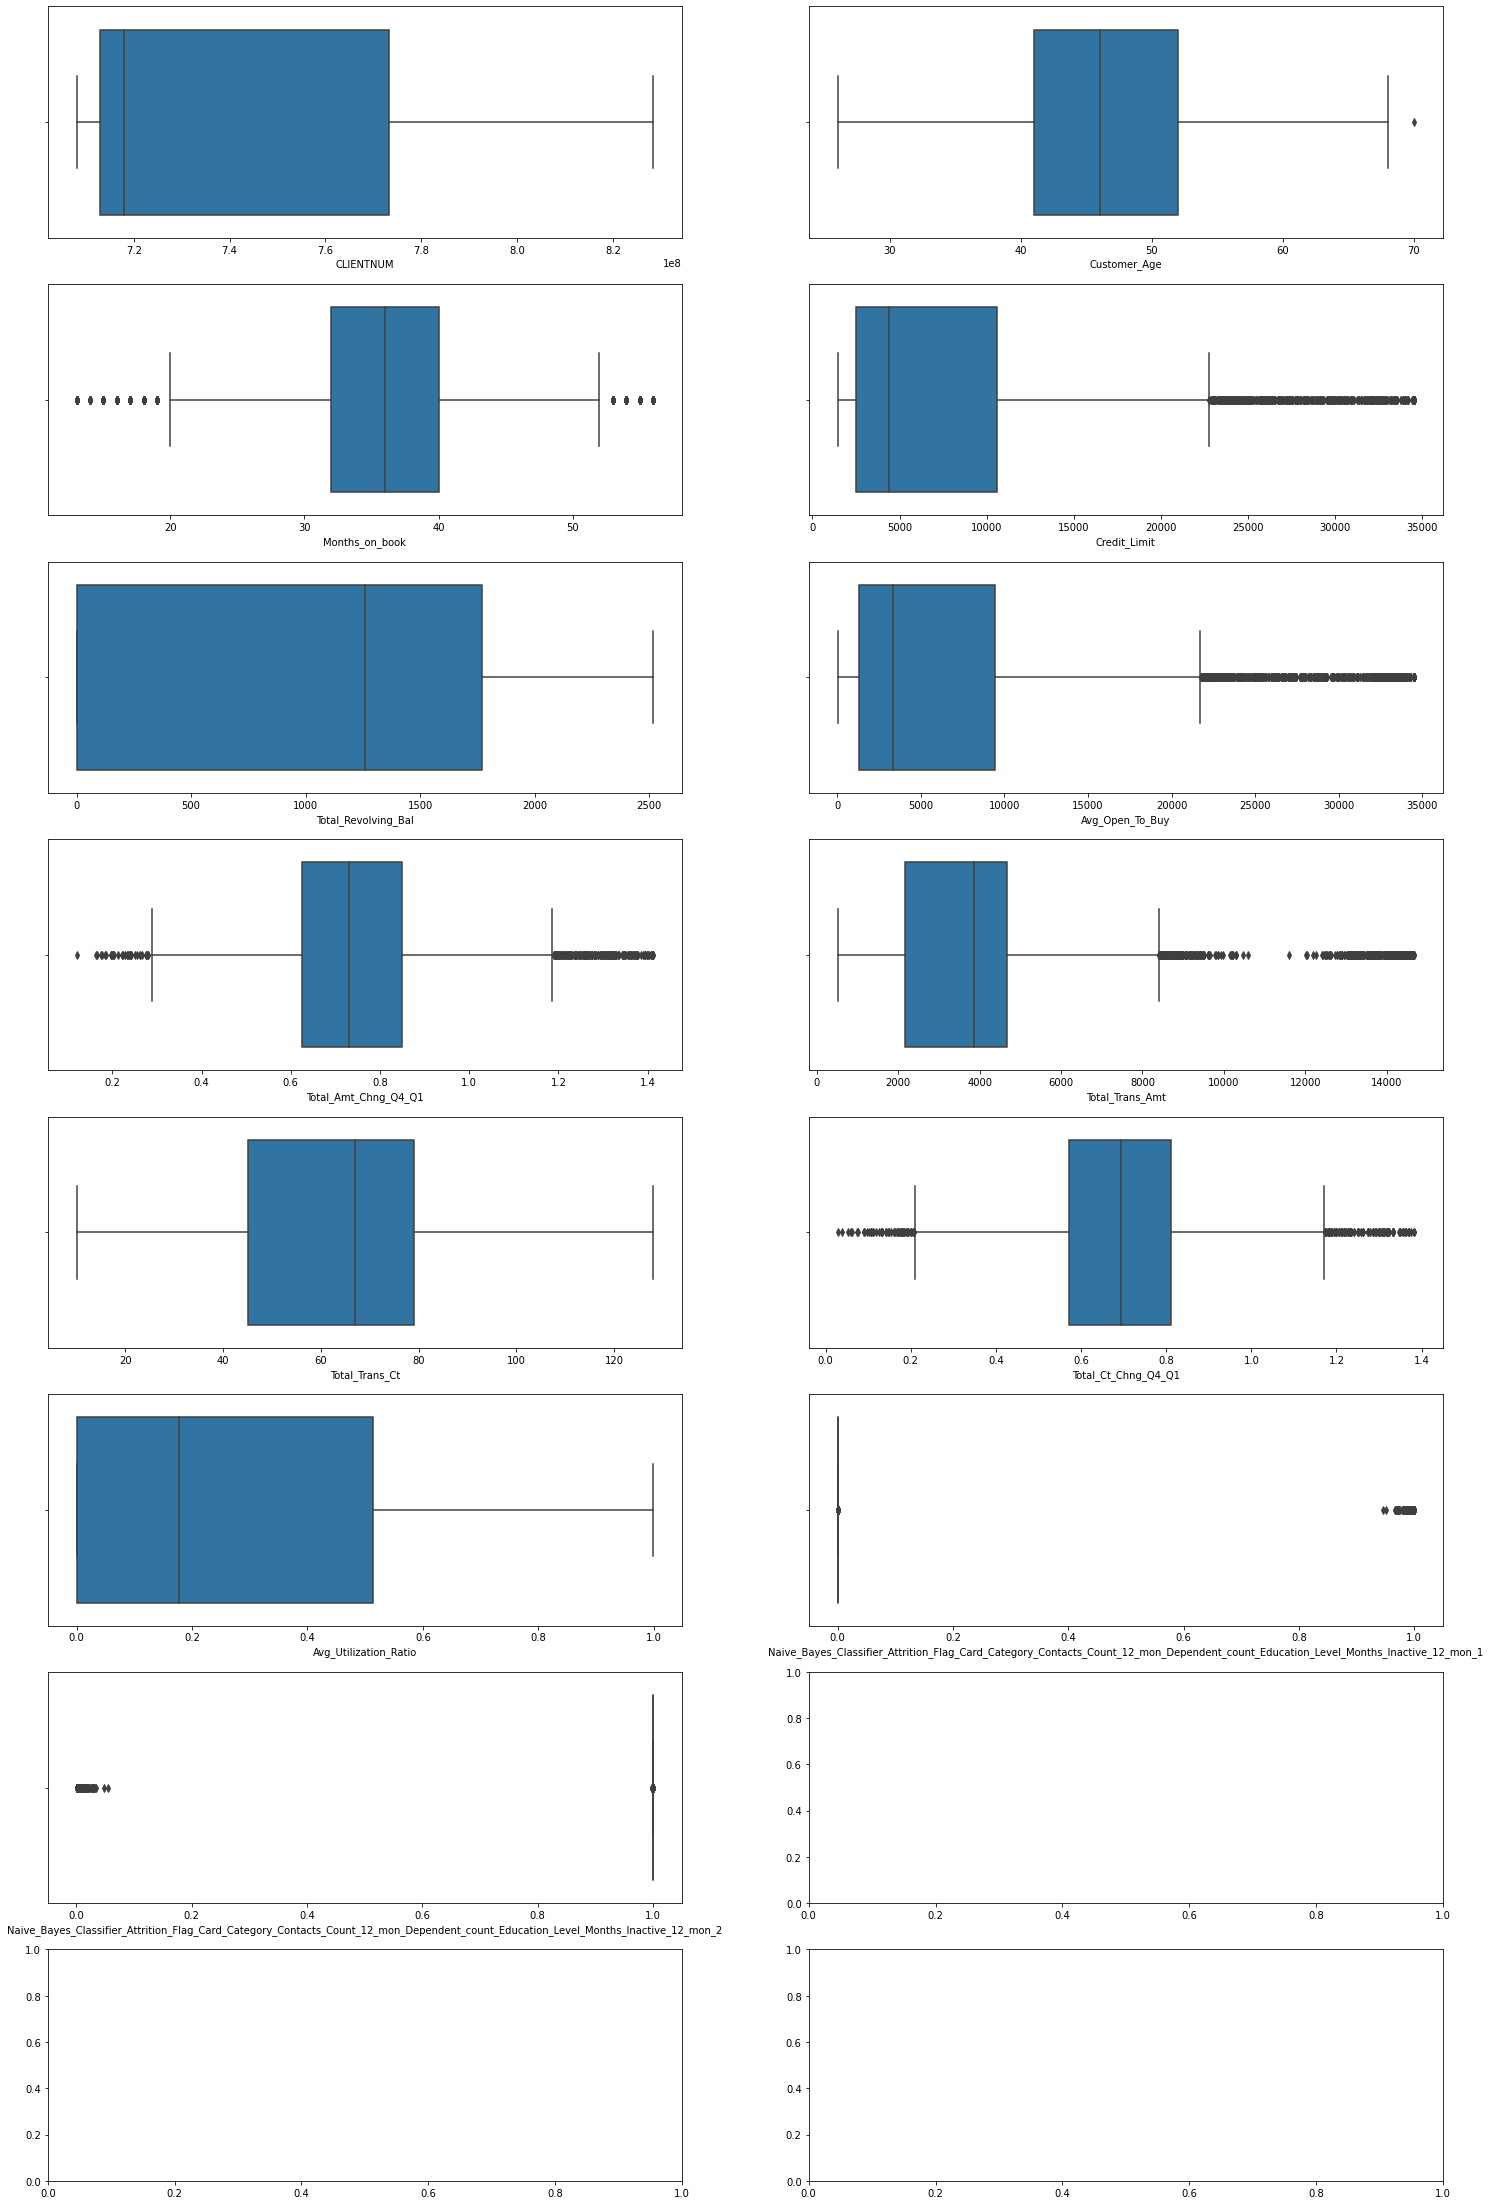

In [11]:
fig, axs = plt.subplots(8, 2, figsize=(25, 40))
axes = [item for sublist in axs for item in sublist]
j = 0

for i in numeric_names:
    sea.boxplot(data=bank, x=bank[i], ax=axes[j])
    j += 1

plt.show()

In [12]:
bank = bank[bank.columns]

bank.to_csv('BankChurnML.csv')